In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (891, 15)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# Drop columns that are redundant or not useful for prediction
df = df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'])

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())        # Median for numerical
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # Mode for categorical

# Confirm no missing values left
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [10]:
# 🔹 Make sure you've cleaned the data but NOT encoded yet!
# At this point, df still has: 'sex' (male/female), 'embarked' (C/Q/S)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for nicer plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

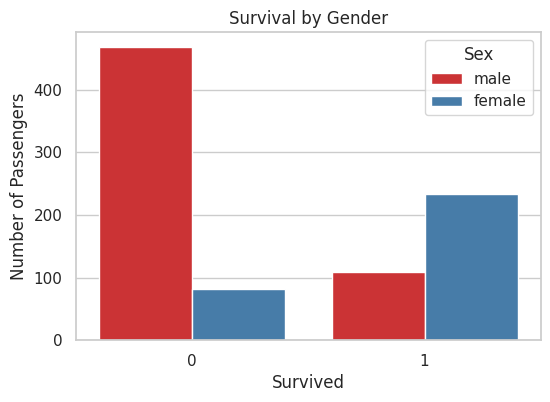

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='sex', data=df, palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex')
plt.show()

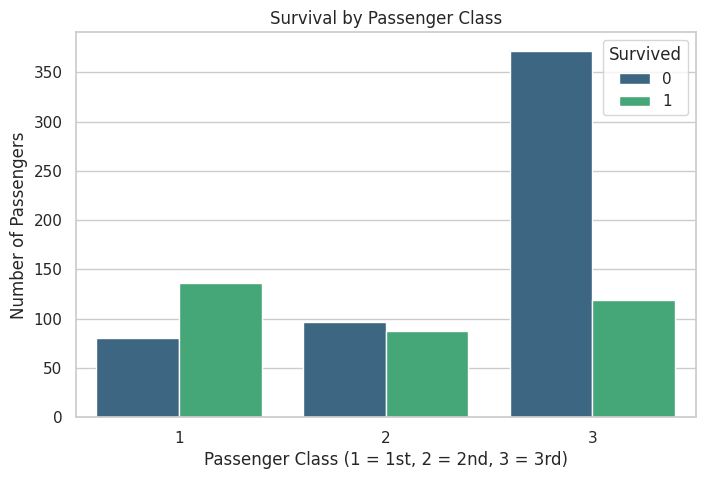

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='survived', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived')
plt.show()

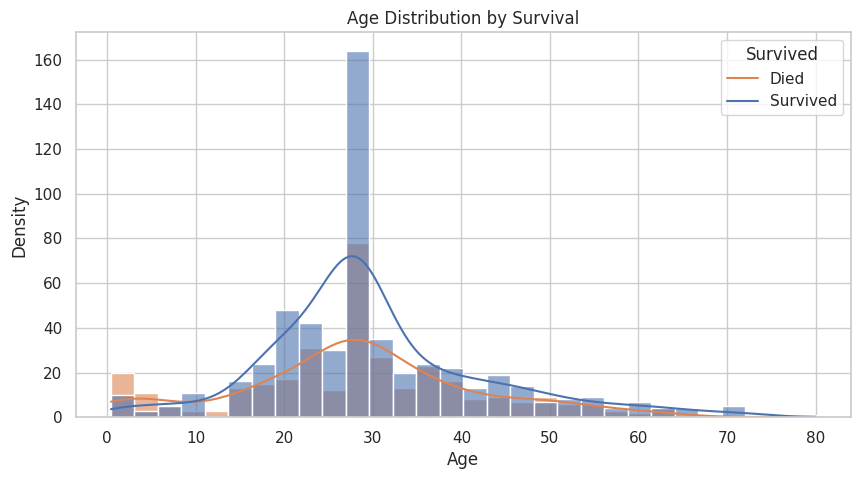

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30, alpha=0.6)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

/tmp/ipykernel_10258/3527129683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=df, palette='Set2')


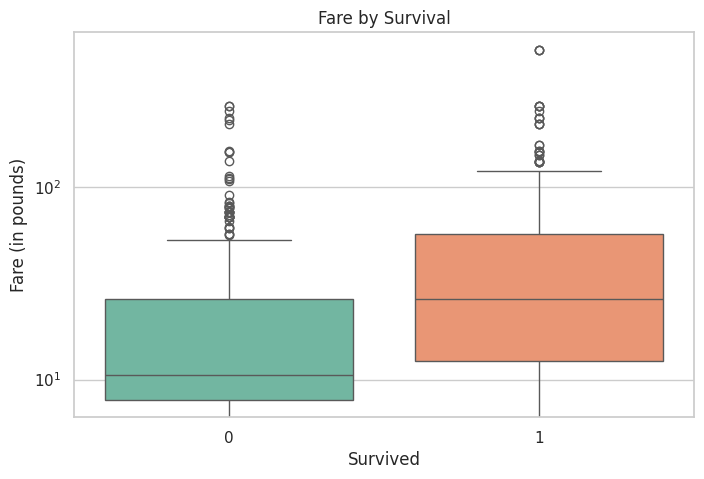

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='fare', data=df, palette='Set2')
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare (in pounds)')
plt.yscale('log')  # Fare is skewed — log scale helps
plt.show()

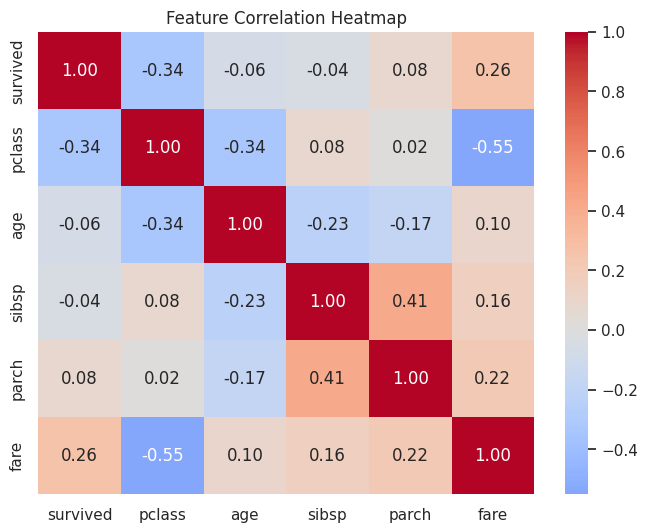

In [16]:
# Select numerical columns (including pclass, which is ordinal)
numerical_cols = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [18]:
X = df.drop(columns=['survived'])
y = df['survived']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.linear_model import LogisticRegression

# Create model
lr_model = LogisticRegression(max_iter=200)  # max_iter to ensure convergence

# Train
lr_model.fit(X_train, y_train)

# Predict (probabilities and classes)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability of survival
y_pred = lr_model.predict(X_test)                    # Class (0 or 1)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.81

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [22]:
# Example: 25-year-old male, 3rd class, no family, fare=10, embarked=S
new_passenger = pd.DataFrame({
    'pclass': [3],
    'age': [25],
    'sibsp': [0],
    'parch': [0],
    'fare': [10],
    'sex_male': [1],
    'embarked_Q': [0],
    'embarked_S': [1]
})

# Reorder to match training columns
new_passenger = new_passenger.reindex(columns=X.columns, fill_value=0)

# Predict
survival_prob = lr_model.predict_proba(new_passenger)[0][1]
print(f"Predicted survival probability: {survival_prob:.2%}")

Predicted survival probability: 11.84%
